In [140]:
#pip install sklearn

In [1]:
#importing modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

#reading dataset to df
df = pd.read_csv('nyc-rolling-sales.csv')

#dropping empty columnns
df.drop(['EASE-MENT','Unnamed: 0'], axis=1, inplace=True)

df.drop(['BUILDING CLASS AT PRESENT', 'TAX CLASS AT PRESENT'],axis=1, inplace=True)

df.drop(['ADDRESS'],axis=1, inplace=True)
df.head(50)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   BLOCK                           84548 non-null  int64 
 4   LOT                             84548 non-null  int64 
 5   APARTMENT NUMBER                84548 non-null  object
 6   ZIP CODE                        84548 non-null  int64 
 7   RESIDENTIAL UNITS               84548 non-null  int64 
 8   COMMERCIAL UNITS                84548 non-null  int64 
 9   TOTAL UNITS                     84548 non-null  int64 
 10  LAND SQUARE FEET                84548 non-null  object
 11  GROSS SQUARE FEET               84548 non-null  object
 12  YEAR BUILT                      84548 non-null

In [2]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,392,6,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,399,26,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,399,39,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,402,21,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,404,55,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [142]:
#Checking for duplicate rows
print(f'Original dataframe shape: {df.shape}')
duplicate_rows = df[df.duplicated()]

#dropping duplicates
df = df.drop_duplicates()
print('Modified dataframe shape: {}'.format(df.shape))

Original dataframe shape: (84548, 17)
Modified dataframe shape: (83592, 17)


In [143]:
#replacing - with NaN
print('Original dataframe shape: {}'.format(df.shape))
df.replace(' -  ',0,inplace=True)
print('Modified dataframe shape: {}'.format(df.shape))

Original dataframe shape: (83592, 17)
Modified dataframe shape: (83592, 17)


In [144]:
int_col = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']
for col in int_col:
    df[col] = df[col].astype(np.int64)


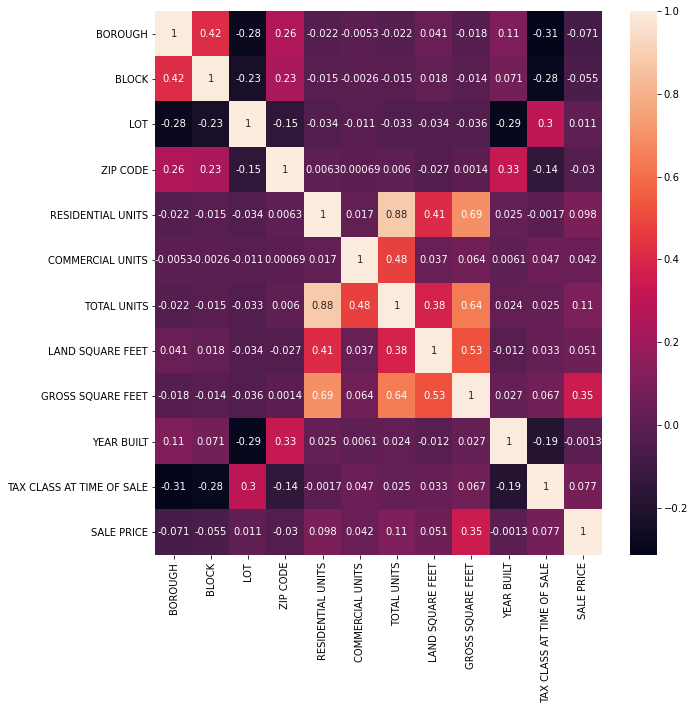

In [145]:
plt.figure(figsize=[10,10])
sns.heatmap(df.corr(),annot=True)
plt.show()

In [146]:
#changing sale date into sale month and year

df['SALE DATE']= pd.to_datetime(df['SALE DATE'], errors='coerce')
df['SALE MONTH'] = pd.DatetimeIndex(df['SALE DATE']).month.astype(str)
df['SALE YEAR'] = pd.DatetimeIndex(df['SALE DATE']).year.astype(str)
df.drop('SALE DATE', axis=1, inplace=True)

In [147]:
#combining sale month and sale year into a single column with 12 categories
df['salemonth'] = df['SALE MONTH']+ df['SALE YEAR']
count=1
for x in df['salemonth'].unique():
    df['salemonth'] = df['salemonth'].replace(x,count,regex=True)
    count = count + 1
df['SALE MONTH'] = df['salemonth']
df.drop(['salemonth','SALE YEAR'], axis = 1,inplace=True)

In [148]:
#ZIP CODE and YEAR BUILT contains several 0 values, setting these to NaN

df['ZIP CODE'].replace(0, np.nan,inplace=True)
df['YEAR BUILT'].replace(0, np.nan,inplace=True)


In [149]:
df['GROSS SQUARE FEET'].replace(0, np.nan, inplace=True)
df['LAND SQUARE FEET'].replace(0, np.nan, inplace =True)
df['SALE PRICE'].replace(0, np.nan, inplace=True)

In [150]:
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].fillna(df.groupby(['TOTAL UNITS', 'RESIDENTIAL UNITS'])['GROSS SQUARE FEET'].transform('mean'))
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].fillna(df.groupby(['GROSS SQUARE FEET', 'RESIDENTIAL UNITS'])['LAND SQUARE FEET'].transform('mean'))
df['SALE PRICE'] = df['SALE PRICE'].fillna(df.groupby(['GROSS SQUARE FEET', 'TOTAL UNITS'])['SALE PRICE'].transform('mean'))
df = df.dropna()

In [151]:
df = df[(df['COMMERCIAL UNITS'] < 12)]
df = df[(df['RESIDENTIAL UNITS'] < 50)]
df = df[(df['TOTAL UNITS'] > 0)]
df = df[df['TOTAL UNITS'] == df['COMMERCIAL UNITS'] + df['RESIDENTIAL UNITS']]

df = df[(df['BLOCK'] > 0) & (df['BLOCK'] < 15000)]
df = df[(df['LOT'] > 0) & (df['LOT'] < 3000)]

df = df[(df['LAND SQUARE FEET'] < 40000)]
df = df[(df['GROSS SQUARE FEET'] < 50000)]

df = df[(df['SALE PRICE'] > 10000) & (df['SALE PRICE'] < 10000000)]
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51835 entries, 0 to 84547
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         51835 non-null  int64  
 1   NEIGHBORHOOD                    51835 non-null  object 
 2   BUILDING CLASS CATEGORY         51835 non-null  object 
 3   BLOCK                           51835 non-null  int64  
 4   LOT                             51835 non-null  int64  
 5   APARTMENT NUMBER                51835 non-null  object 
 6   ZIP CODE                        51835 non-null  float64
 7   RESIDENTIAL UNITS               51835 non-null  int64  
 8   COMMERCIAL UNITS                51835 non-null  int64  
 9   TOTAL UNITS                     51835 non-null  int64  
 10  LAND SQUARE FEET                51835 non-null  float64
 11  GROSS SQUARE FEET               51835 non-null  float64
 12  YEAR BUILT                      

<AxesSubplot:xlabel='SALE PRICE'>

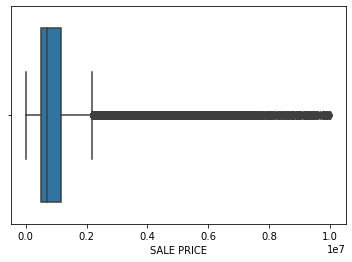

In [152]:
sns.boxplot(x=df['SALE PRICE'])

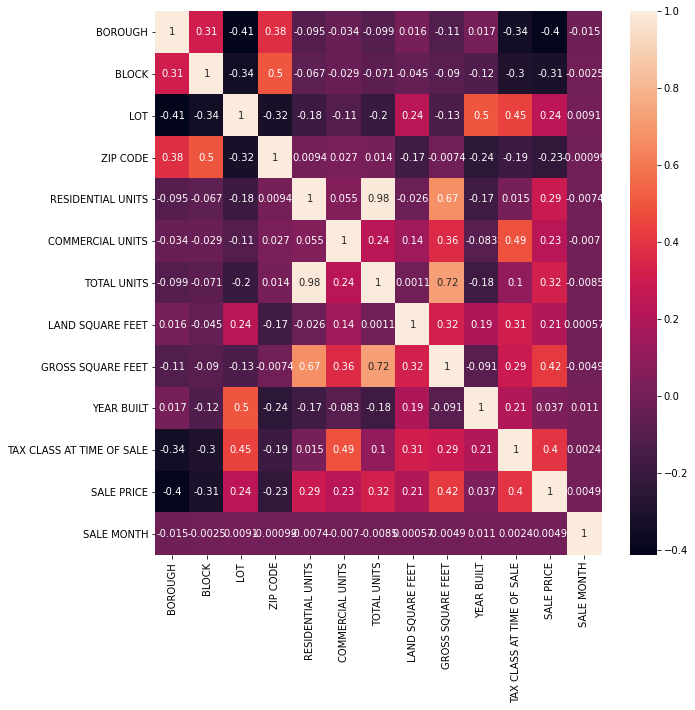

In [153]:
plt.figure(figsize=[10,10])
sns.heatmap(df.corr(),annot=True)
plt.show()

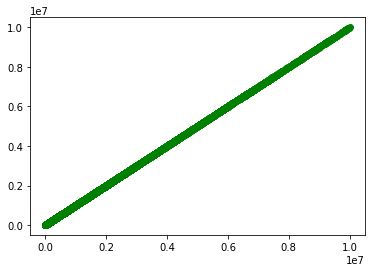

In [154]:
x = df['SALE PRICE']
y = df['SALE PRICE']
plt.scatter(x, y, color='green')
plt.show()

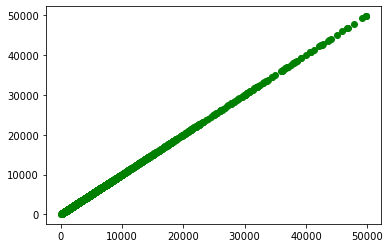

In [155]:
x = df['GROSS SQUARE FEET']
y = df['GROSS SQUARE FEET']
plt.scatter(x, y, color='green')
plt.show()

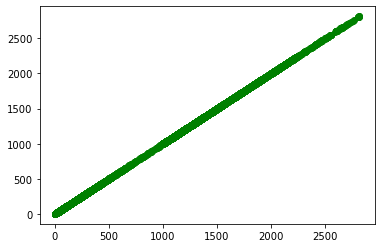

In [156]:
x = df['LOT']
y = df['LOT']
plt.scatter(x, y, color='green')
plt.show()

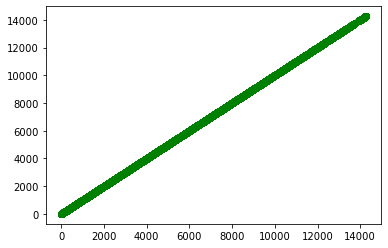

In [157]:
x = df['BLOCK']
y = df['BLOCK']
plt.scatter(x, y, color='green')
plt.show()

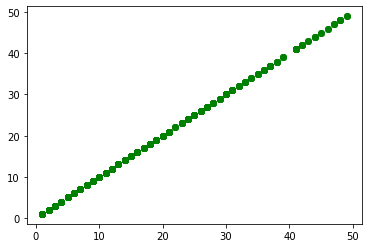

In [158]:
x = df['TOTAL UNITS']
y = df['TOTAL UNITS']
plt.scatter(x, y, color='green')
plt.show()

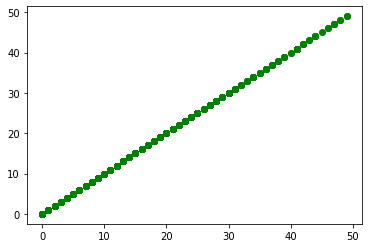

In [159]:
x = df['RESIDENTIAL UNITS']
y = df['RESIDENTIAL UNITS']
plt.scatter(x, y, color='green')
plt.show()

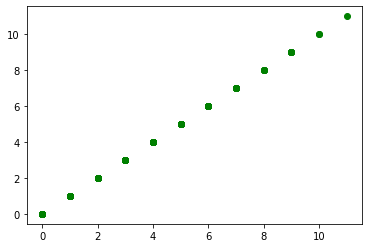

In [160]:
x = df['COMMERCIAL UNITS']
y = df['COMMERCIAL UNITS']
plt.scatter(x, y, color='green')
plt.show()

<AxesSubplot:xlabel='GROSS SQUARE FEET'>

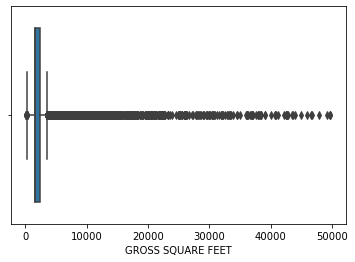

In [161]:
sns.boxplot(x=df['GROSS SQUARE FEET'])



<AxesSubplot:xlabel='LAND SQUARE FEET'>

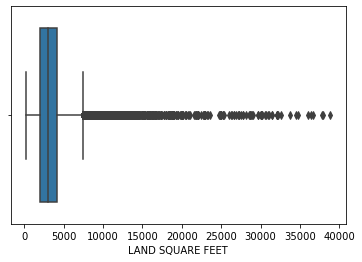

In [162]:
sns.boxplot(x=df['LAND SQUARE FEET'])

In [163]:
#Categorical columns for one-hot / label encoding
categorical_cols = ['NEIGHBORHOOD',
                    'BLOCK',
                    'LOT',
                    'TAX CLASS AT TIME OF SALE',
                    'BUILDING CLASS CATEGORY', 
                    'ZIP CODE',
                    'SALE MONTH',
                    'YEAR BUILT',
                    'BOROUGH',
                    'BUILDING CLASS AT TIME OF SALE',
                    'APARTMENT NUMBER',
                   ]

#Removing samples that only occur once in the entire dataset
#for x in categorical_cols:
#    counts = df[x].value_counts()
#    df = df[~df[x].isin(counts[counts < 2].index)]
#df.info()

In [164]:
#Combining building classes for dimension reduction when one-hot encoding
for x in df['BUILDING CLASS AT TIME OF SALE'].unique():
    df['BUILDING CLASS AT TIME OF SALE'] = df['BUILDING CLASS AT TIME OF SALE'].replace(x,x[0], regex=True)

#Further dimension reduction, removing rows that occur less than 100 times
counts = df['BUILDING CLASS AT TIME OF SALE'].value_counts()
df = df[~df['BUILDING CLASS AT TIME OF SALE'].isin(counts[counts < 100].index)]

In [165]:
#One-hot encoding certain categorical features with low cardinality
one_hot = OneHotEncoder(handle_unknown='ignore')
one_hot_features =['BOROUGH',
                  'BUILDING CLASS AT TIME OF SALE',
                  ]

for x in one_hot_features:
    one_hot_encoded = pd.get_dummies(df[x])
    one_hot_encoded.info(verbose=True, memory_usage=True, null_counts=True)
    df = df.drop(x,axis=1)
    categorical_cols.remove(x)
    df = pd.concat([df, one_hot_encoded] ,axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51531 entries, 0 to 84545
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       51531 non-null  uint8
 1   2       51531 non-null  uint8
 2   3       51531 non-null  uint8
 3   4       51531 non-null  uint8
 4   5       51531 non-null  uint8
dtypes: uint8(5)
memory usage: 654.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 51531 entries, 0 to 84545
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       51531 non-null  uint8
 1   B       51531 non-null  uint8
 2   C       51531 non-null  uint8
 3   E       51531 non-null  uint8
 4   F       51531 non-null  uint8
 5   G       51531 non-null  uint8
 6   K       51531 non-null  uint8
 7   O       51531 non-null  uint8
 8   R       51531 non-null  uint8
 9   S       51531 non-null  uint8
dtypes: uint8(10)
memory usage: 905.8 KB


<ipython-input-165-5bdbb0f8d2f1>:9: FutureWarning: null_counts is deprecated. Use show_counts instead
  one_hot_encoded.info(verbose=True, memory_usage=True, null_counts=True)


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51531 entries, 0 to 84545
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   NEIGHBORHOOD               51531 non-null  object 
 1   BUILDING CLASS CATEGORY    51531 non-null  object 
 2   BLOCK                      51531 non-null  int64  
 3   LOT                        51531 non-null  int64  
 4   APARTMENT NUMBER           51531 non-null  object 
 5   ZIP CODE                   51531 non-null  float64
 6   RESIDENTIAL UNITS          51531 non-null  int64  
 7   COMMERCIAL UNITS           51531 non-null  int64  
 8   TOTAL UNITS                51531 non-null  int64  
 9   LAND SQUARE FEET           51531 non-null  float64
 10  GROSS SQUARE FEET          51531 non-null  float64
 11  YEAR BUILT                 51531 non-null  float64
 12  TAX CLASS AT TIME OF SALE  51531 non-null  int64  
 13  SALE PRICE                 51531 non-null  flo

In [167]:
label = LabelEncoder()

for x in categorical_cols:
    df[x] = df[x].astype('category')
    df[x] = label.fit_transform(df[x])

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51531 entries, 0 to 84545
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   NEIGHBORHOOD               51531 non-null  int32  
 1   BUILDING CLASS CATEGORY    51531 non-null  int32  
 2   BLOCK                      51531 non-null  int64  
 3   LOT                        51531 non-null  int64  
 4   APARTMENT NUMBER           51531 non-null  int32  
 5   ZIP CODE                   51531 non-null  int64  
 6   RESIDENTIAL UNITS          51531 non-null  int64  
 7   COMMERCIAL UNITS           51531 non-null  int64  
 8   TOTAL UNITS                51531 non-null  int64  
 9   LAND SQUARE FEET           51531 non-null  float64
 10  GROSS SQUARE FEET          51531 non-null  float64
 11  YEAR BUILT                 51531 non-null  int64  
 12  TAX CLASS AT TIME OF SALE  51531 non-null  int64  
 13  SALE PRICE                 51531 non-null  flo

In [169]:
cols = ['GROSS SQUARE FEET',
        'LAND SQUARE FEET',
        'SALE PRICE'
       ]

for col in cols:
    df[col] = df[col].astype(int)

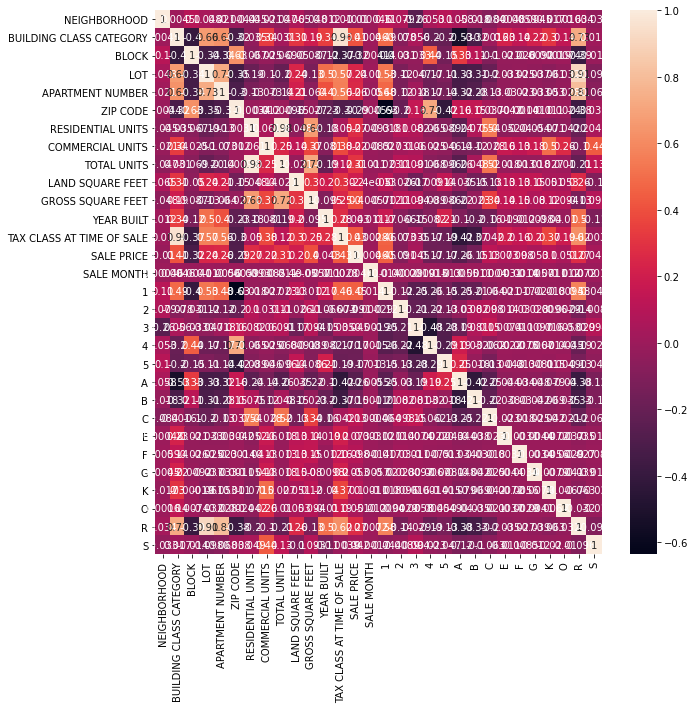

In [170]:
plt.figure(figsize=[10,10])
sns.heatmap(df.corr(),annot=True)
plt.show()

<ipython-input-171-54447228ea93>:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


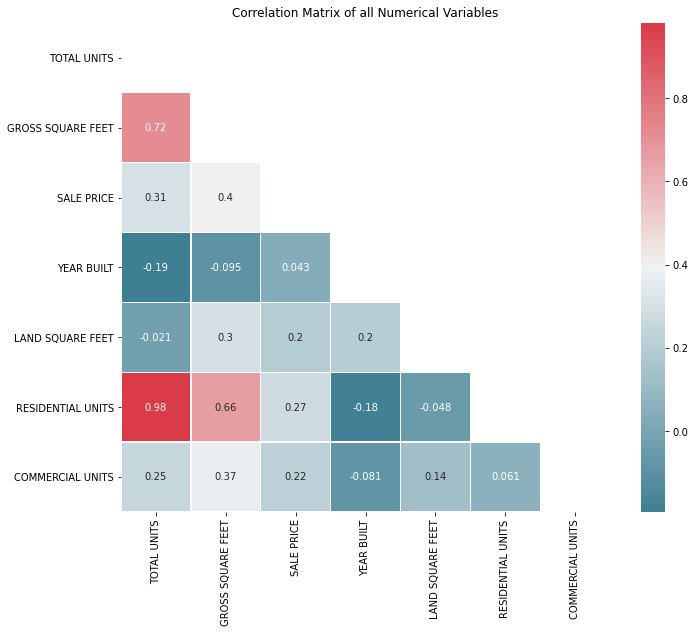

In [171]:
df.drop(['LOT', 'ZIP CODE'],axis=1,inplace=True)
d= df[['TOTAL UNITS',
       'GROSS SQUARE FEET',
       'SALE PRICE',
       'YEAR BUILT',
       'LAND SQUARE FEET',
       'RESIDENTIAL UNITS', 
       'COMMERCIAL UNITS'
      ]]
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, 
            square=True, linewidths=.5, annot=True, cmap=cmap)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of all Numerical Variables')
plt.show()



In [172]:
df['ADDRESS'].nunique()

KeyError: 'ADDRESS'

In [173]:
df2 = df.copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51531 entries, 0 to 84545
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   NEIGHBORHOOD               51531 non-null  int32
 1   BUILDING CLASS CATEGORY    51531 non-null  int32
 2   BLOCK                      51531 non-null  int64
 3   APARTMENT NUMBER           51531 non-null  int32
 4   RESIDENTIAL UNITS          51531 non-null  int64
 5   COMMERCIAL UNITS           51531 non-null  int64
 6   TOTAL UNITS                51531 non-null  int64
 7   LAND SQUARE FEET           51531 non-null  int32
 8   GROSS SQUARE FEET          51531 non-null  int32
 9   YEAR BUILT                 51531 non-null  int64
 10  TAX CLASS AT TIME OF SALE  51531 non-null  int64
 11  SALE PRICE                 51531 non-null  int32
 12  SALE MONTH                 51531 non-null  int64
 13  1                          51531 non-null  uint8
 14  2                     

In [174]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, HuberRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, classification_report, confusion_matrix, accuracy_score
import math
#from keras.models import Sequential
#from keras.layers import Dense
#import mglearn


In [175]:
sc = StandardScaler()

X = df.drop(['SALE PRICE'], axis=1)
y = df['SALE PRICE']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state=0)
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)


In [176]:
kf = KFold(n_splits=3, random_state=0, shuffle = True)
def grid_search(model, parameters):
    grid = GridSearchCV(model,parameters, cv=kf, scoring='r2')
    grid.fit(X_train, y_train)
    print (grid.best_score_)
    print (grid.best_params_)
    print (grid.best_estimator_)

In [177]:
#Cross validation for r2 and rmse score
def cross_val_R2(model):
    R2_scores = cross_val_score(model, X_test, y_test, cv=10, scoring='r2')
    R2 = R2_scores.mean()
    print('The R-squared is {:.4}'.format(R2))
    
def cross_val_RMSE(model):
    mse_scores = cross_val_score(model, X_test, y_test, cv=10, scoring='neg_mean_squared_error')
    mse = mse_scores.mean()
    rmse = math.sqrt(mse*-1)
    print('The root mean squared is {:.4}'.format(rmse))


In [178]:
forest = RandomForestRegressor(bootstrap=False,
                               max_features='log2',
                               min_samples_split=0.0012,
                               n_estimators=30
                              )
forest.fit(X_train,y_train)

#Cross validation
cross_val_R2(forest)
cross_val_RMSE(forest)
#grid search to find best parameters
"""
forest_parameters = { 
            "n_estimators"      : [10,20,30,50,100],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }
grid_search(forest, forest_parameters)
"""

The R-squared is 0.6133
The root mean squared is 7.038e+05


'\nforest_parameters = { \n            "n_estimators"      : [10,20,30,50,100],\n            "max_features"      : ["auto", "sqrt", "log2"],\n            "min_samples_split" : [2,4,8],\n            "bootstrap": [True, False],\n            }\ngrid_search(forest, forest_parameters)\n'

In [179]:
lr = LinearRegression(fit_intercept=False,
                      normalize=True
                     )
lr.fit(X_train, y_train)

#cross validation
cross_val_R2(lr)
cross_val_RMSE(lr)

"""
lr_parameters = {'fit_intercept':[True,False],
                 'normalize':[True,False],
                 'copy_X':[True, False]
                }
grid_search(lr, lr_parameters)
"""

    

The R-squared is 0.4222
The root mean squared is 8.611e+05


"\nlr_parameters = {'fit_intercept':[True,False],\n                 'normalize':[True,False],\n                 'copy_X':[True, False]\n                }\ngrid_search(lr, lr_parameters)\n"

In [180]:
#We chose HuberRegressor because it is resilient to outliers,
#the default episolon value (1.35) caused the model to underfit,
#which leads us to believe that our preprocessing has worked decently
huber = HuberRegressor(alpha = 0.0001, epsilon = 12,max_iter = 5000)
huber.fit(X_train,y_train)

#Cross validation
cross_val_R2(huber)
cross_val_RMSE(huber)


#Grid search
"""
huber_parameters ={'alpha':[0.1,0.01,0.001,0.0001],
                   'epsilon':[1,2,4,7,12]
                  }
grid_search(huber, huber_parameters)
"""

The R-squared is 0.4106
The root mean squared is 8.703e+05


"\nhuber_parameters ={'alpha':[0.1,0.01,0.001,0.0001],\n                   'epsilon':[1,2,4,7,12]\n                  }\ngrid_search(huber, huber_parameters)\n"

In [184]:
neigh = KNeighborsRegressor(n_neighbors=30,
                            weights='distance'
                           )
neigh.fit(X_train,y_train)

#Cross validation
cross_val_R2(neigh)
cross_val_RMSE(neigh)

#neigh_parameters = dict(n_neighbors = list(range(10,20)), weights = ["uniform", "distance"])
#grid_search(neigh,neigh_parameters)

The R-squared is 0.4569
The root mean squared is 8.352e+05


In [182]:
#We use 'adam' as our solver because of our sample size, sgd is more suitable for datasets with fewer samples
#We chose 'relu' as our activation method as it gave us the best R2 score and it was also faster
#vi bruker relu som activation method fordi logistic og tanh ga oss veldig dårlig score, 
#identity ga oss grei score men relu ga oss bedre og var raskere.

nn = MLPRegressor(hidden_layer_sizes = [60,60,80,120,160],
                  activation='relu',
                  alpha = 0.1,
                  max_iter=10000,
                  solver='adam')
nn.fit(X_train, y_train)

#Got some slight overfitting when we had 'alpha' = 1, changing it solved it
#We tried out many different layer sizes and number of neurons,
#at first we had 2-10 hidden layers with 10-25 neurons in each,
#after much testing we settled at the current parameters as they gave us the best R2 score (~0.58) 

#R2 and RMSE scores
pred=nn.predict(X_test)
Rs = r2_score(y_test, pred)
rmse=np.sqrt(mean_squared_error(y_test,pred))
print('The R-squared is {:.4}'.format(Rs))
print('The root mean squared is {:.4}'.format(rmse))



The R-squared is 0.5635
The root mean squared is 7.492e+05


In [183]:
#Ran grid search to find best alpha value for each model,
#After settling on alpha values, all models gave similar R2 and RMSE scores


random_state = 42

Models=[Lasso(max_iter=10000,
              alpha = 1,
              random_state=random_state,
             ), 
        Ridge(max_iter=10000,
              alpha = 15,
              random_state=random_state,
             ),
        ElasticNet(max_iter=10000,
                   alpha = 0.0001,
                   random_state=random_state,
                  )]
for models in Models:
    cross_val_R2(models)
    cross_val_RMSE(models)


#grid search
"""
for model, clf in zip(Models,range(len(Models))):
    if clf==0:
        parameters={'alpha':[0.0005,0.0006,0.06,0.5,0.0001,0.01,1]}            
        grid_search(model,parameters)

    elif clf==1:
        parameters = {'alpha':[1,2,3,5,10,11,12,13,14,15]}
        grid_search(model,parameters)

    else:
        parameters ={'alpha':[0.06,0.5,0.0001,0.01,1,2,3,4,4.5]}
        grid_search(model,parameters)
        
    Rs = r2_score(y_test, pred)
    rmse=np.sqrt(mean_squared_error(y_test,pred))

    print('The R-squared is {:.4}'.format(Rs))
    print('The root mean squared is {:.4}'.format(rmse))
 """   

C:\Users\oskar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84913930280356.0, tolerance: 1218130430899.3804
  model = cd_fast.enet_coordinate_descent(
C:\Users\oskar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84101174880568.0, tolerance: 1221417068897.4866
  model = cd_fast.enet_coordinate_descent(
C:\Users\oskar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 477696057239455.0, tolerance: 1194360842096.5596
  model = cd_fast.enet_coordinate_descent(
C:\Users\oskar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

The R-squared is 0.4222


C:\Users\oskar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84913930280356.0, tolerance: 1218130430899.3804
  model = cd_fast.enet_coordinate_descent(
C:\Users\oskar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84101174880568.0, tolerance: 1221417068897.4866
  model = cd_fast.enet_coordinate_descent(
C:\Users\oskar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 477696057239455.0, tolerance: 1194360842096.5596
  model = cd_fast.enet_coordinate_descent(
C:\Users\oskar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

The root mean squared is 8.611e+05
The R-squared is 0.4225
The root mean squared is 8.61e+05


C:\Users\oskar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3457127223269048.5, tolerance: 1218130430899.3804
  model = cd_fast.enet_coordinate_descent(
C:\Users\oskar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3494504770489058.0, tolerance: 1221417068897.4866
  model = cd_fast.enet_coordinate_descent(
C:\Users\oskar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3439889274573351.5, tolerance: 1194360842096.5596
  model = cd_fast.enet_coordinate_descent(
C:\Users\oskar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

The R-squared is 0.4222


C:\Users\oskar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3457127223269048.5, tolerance: 1218130430899.3804
  model = cd_fast.enet_coordinate_descent(
C:\Users\oskar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3494504770489058.0, tolerance: 1221417068897.4866
  model = cd_fast.enet_coordinate_descent(
C:\Users\oskar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3439889274573351.5, tolerance: 1194360842096.5596
  model = cd_fast.enet_coordinate_descent(
C:\Users\oskar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

The root mean squared is 8.611e+05


C:\Users\oskar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3384634646079140.5, tolerance: 1192536520424.0208
  model = cd_fast.enet_coordinate_descent(


"\nfor model, clf in zip(Models,range(len(Models))):\n    if clf==0:\n        parameters={'alpha':[0.0005,0.0006,0.06,0.5,0.0001,0.01,1]}            \n        grid_search(model,parameters)\n\n    elif clf==1:\n        parameters = {'alpha':[1,2,3,5,10,11,12,13,14,15]}\n        grid_search(model,parameters)\n\n    else:\n        parameters ={'alpha':[0.06,0.5,0.0001,0.01,1,2,3,4,4.5]}\n        grid_search(model,parameters)\n        \n    Rs = r2_score(y_test, pred)\n    rmse=np.sqrt(mean_squared_error(y_test,pred))\n\n    print('The R-squared is {:.4}'.format(Rs))\n    print('The root mean squared is {:.4}'.format(rmse))\n "

In [ ]:
X2 = df2.drop(['SALE PRICE'], axis=1)
Y2 = df2['SALE PRICE']

min_max_scaler = preprocessing.MinMaxScaler()
X_scale2 = min_max_scaler.fit_transform(X)

In [ ]:
X_scale2

In [ ]:
X_train2, X_val_and_test2, Y_train2, Y_val_and_test2 = train_test_split(X_scale2, Y2, test_size=0.5)

X_val2, X_test2, Y_val2, Y_test2 = train_test_split(X_val_and_test2, Y_val_and_test2, test_size=0.9)

print(X_train2.shape, X_val2.shape, X_test2.shape, Y_train2.shape, Y_val2.shape, Y_test2.shape)

In [ ]:
from keras import backend

def mean_squared_error(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)

model = Sequential([
    Dense(32, activation='relu', input_shape=(56,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model.compile(loss='mse', optimizer='adam',
              metrics=[rmse])
hist = model.fit(X_train2, Y_train2, 
          batch_size=32, epochs=100,
          validation_data=(X_val2, Y_val2))

pyplot.plot(history.history['rmse'])
pyplot.show()

In [ ]:
model.evaluate(X_test2, Y_test2)[1]

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
plt.plot(hist.history['mean_squared_error'])
plt.plot(hist.history['mean_absolute_error'])
plt.plot(hist.history['mean_absolute_percentage_error']
plt.title('accuracy')
plt.ylabel('mean_squared_error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
model_2 = Sequential([
    Dense(750, activation='relu'),
    Dense(750, activation='relu'),
    Dense(750, activation='relu'),
    Dense(750, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[metrics.mean_squared_error,
              metrics.mean_absolute_error, 
              metrics.mean_absolute_percentage_error])
hist_2 = model_2.fit(X_train2, Y_train2,
          batch_size=32, epochs=50,
          validation_data=(X_val2, Y_val2))

In [ ]:
model_2.evaluate(X_test2, Y_test2)[1]

In [ ]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
plt.plot(hist_2.history['acc'])
plt.plot(hist_2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [ ]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val2, Y_val2))

In [ ]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

In [ ]:
plt.plot(hist_3.history['acc'])
plt.plot(hist_3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:

scaled_df = df

# Print out the adjustment that the scaler applied to the total_earnings column of data
print("Note: median values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[13], scaler.min_[13]))
multiplied_by = scaler.scale_[13]
added = scaler.min_[13]

scaled_df = pd.DataFrame(scaled_df, columns=df.columns.values)

In [ ]:
##build our model
model = Sequential()

model.add(Dense(50, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(
    X_test[10:],
    y_test[10:],
    epochs=50,
    shuffle=True,
    verbose=2)

In [ ]:
#inference
prediction = model.predict(X[:1])
y_0 = prediction[0][0]
print('Prediction with scaling - {}',format(y_0))
y_0 -= added
y_0 /= multiplied_by
print("Housing Price Prediction  - ${}".format(y_0))

